<a href="https://colab.research.google.com/github/angelica-David/bigData/blob/main/custumers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
pip install pyspark


In [7]:

 from pyspark.sql import SparkSession
 spark = SparkSession.builder.appName("teste").getOrCreate()
 df = spark.createDataFrame([(1, "Robson"), (2, "Maria")], ["id", "nome"])
 df.show()


+---+------+
| id|  nome|
+---+------+
|  1|Robson|
|  2| Maria|
+---+------+



In [8]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!pip install pyspark
!java -version

W: Operation was interrupted before it could finish
openjdk version "11.0.27" 2025-04-15
OpenJDK Runtime Environment (build 11.0.27+6-post-Ubuntu-0ubuntu122.04)
OpenJDK 64-Bit Server VM (build 11.0.27+6-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)


In [13]:
import os

os.environ["JAVA_HOME"] = "/user/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/user/local/lib/python3.10/dist-packages/pyspark"


In [10]:
from google.colab import drive
drive.mount('/content/drive')

# Copiar o CSV para o Drive (ajuste o caminho conforme necessário)
!cp customers-100000.csv /content/drive/MyDrive/


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
from pyspark.sql import SparkSession

spark = (
    SparkSession.builder
    .appName("Customers100k")
    .getOrCreate()
)
spark


In [22]:
print(f"Total de linhas: {df_spark.count()}")


Total de linhas: 100000


In [23]:
print(df_spark.columns)


['Index', 'Customer Id', 'First Name', 'Last Name', 'Company', 'City', 'Country', 'Phone 1', 'Phone 2', 'Email', 'Subscription Date', 'Website']


In [12]:
csv_path = "customers-100000.csv"   # ajuste se o nome ou pasta mudar

df_spark = (
    spark.read
    .option("header", True)        # usa a primeira linha como cabeçalho
    .option("inferSchema", True)   # tenta adivinhar tipos (int, double, etc.)
    .csv(csv_path)
)

df_spark.printSchema()
print(f"Total de linhas: {df_spark.count():,}")


root
 |-- Index: integer (nullable = true)
 |-- Customer Id: string (nullable = true)
 |-- First Name: string (nullable = true)
 |-- Last Name: string (nullable = true)
 |-- Company: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Phone 1: string (nullable = true)
 |-- Phone 2: string (nullable = true)
 |-- Email: string (nullable = true)
 |-- Subscription Date: date (nullable = true)
 |-- Website: string (nullable = true)

Total de linhas: 100,000


In [26]:
(
    df_spark.groupBy("Country")
    .count()
    .orderBy("count", ascending=False)
    .limit(20)
    .show(truncate=False)
)
# os 20 paises com mais clientes

+------------------------------------+-----+
|Country                             |count|
+------------------------------------+-----+
|Congo                               |835  |
|Korea                               |820  |
|Saudi Arabia                        |463  |
|Pitcairn Islands                    |456  |
|Saint Martin                        |453  |
|Paraguay                            |445  |
|Canada                              |444  |
|American Samoa                      |443  |
|Saint Kitts and Nevis               |443  |
|Mauritania                          |441  |
|Cook Islands                        |441  |
|Heard Island and McDonald Islands   |440  |
|Montenegro                          |439  |
|Namibia                             |439  |
|Guyana                              |438  |
|Bolivia                             |438  |
|Guam                                |438  |
|Kenya                               |438  |
|Luxembourg                          |438  |
|United St

In [18]:
df_brasil = df_spark.filter(df_spark.Country == "Brazil")
print(f"Total clientes Brasil: {df_brasil.count()}")
df_brasil.show(5, truncate=False)
#Filtrar clientes do Brasil e mostrar as primeiras 5 linhas

Total clientes Brasil: 395
+-----+---------------+----------+---------+------------------------+----------------+-------+--------------------+---------------------+----------------------------+-----------------+-----------------------------+
|Index|Customer Id    |First Name|Last Name|Company                 |City            |Country|Phone 1             |Phone 2              |Email                       |Subscription Date|Website                      |
+-----+---------------+----------+---------+------------------------+----------------+-------+--------------------+---------------------+----------------------------+-----------------+-----------------------------+
|413  |581BF6EdcB5F644|Alejandro |Calhoun  |David-Wright            |Richardsfurt    |Brazil |(636)844-6844x39596 |001-280-058-4519     |mark21@ritter-barton.com    |2020-07-26       |https://www.kidd-anthony.com/|
|1484 |D58AdB90dD821bC|Nina      |Contreras|Jones Group             |Port Claudiatown|Brazil |2091675760         

In [19]:
from pyspark.sql.functions import col

df_gmail = df_spark.filter(col("Email").endswith("@gmail.com"))
print(f"Clientes com email Gmail: {df_gmail.count()}")
#Contar quantos clientes têm email no domínio Gmail

Clientes com email Gmail: 0


In [27]:
(
    df_spark.groupBy("Company")
    .count()
    .orderBy("count", ascending=False)
    .limit(20)
    .show(truncate=False)
)
#Agrupar clientes por empresa e listar top 20 empresas com mais clientes


+----------------+-----+
|Company         |count|
+----------------+-----+
|Campbell Ltd    |17   |
|Wilkerson Ltd   |17   |
|Booker and Sons |16   |
|Acosta Ltd      |16   |
|Mccarty and Sons|15   |
|Mckenzie PLC    |15   |
|Gregory Group   |15   |
|Gillespie LLC   |14   |
|Riggs PLC       |14   |
|Gomez Inc       |14   |
|Hartman and Sons|14   |
|Ellison Inc     |14   |
|Garza Group     |14   |
|Farmer Ltd      |14   |
|Casey LLC       |13   |
|Horton Group    |13   |
|Warren PLC      |13   |
|Gilmore LLC     |13   |
|Lambert and Sons|13   |
|Irwin Group     |13   |
+----------------+-----+



In [13]:
# Primeiras 5 linhas
df_spark.show(5, truncate=False)

# Descritivas numéricas (apenas colunas numéricas)
df_spark.describe().show()

# Países distintos
df_spark.select("Country").distinct().show()


+-----+---------------+----------+----------+-------------------------+--------------+--------------------------------------------+--------------------+--------------------+--------------------------------+-----------------+-----------------------------+
|Index|Customer Id    |First Name|Last Name |Company                  |City          |Country                                     |Phone 1             |Phone 2             |Email                           |Subscription Date|Website                      |
+-----+---------------+----------+----------+-------------------------+--------------+--------------------------------------------+--------------------+--------------------+--------------------------------+-----------------+-----------------------------+
|1    |ffeCAb7AbcB0f07|Jared     |Jarvis    |Sanchez-Fletcher         |Hatfieldshire |Eritrea                                     |274.188.8773x41185  |001-215-760-4642x969|gabriellehartman@benjamin.com   |2021-11-11       |https://www

In [14]:
(
    df_spark.groupBy("Country")
    .count()
    .orderBy("count", ascending=False)
    .limit(10)
    .show()
)


+--------------------+-----+
|             Country|count|
+--------------------+-----+
|               Congo|  835|
|               Korea|  820|
|        Saudi Arabia|  463|
|    Pitcairn Islands|  456|
|        Saint Martin|  453|
|            Paraguay|  445|
|              Canada|  444|
|Saint Kitts and N...|  443|
|      American Samoa|  443|
|        Cook Islands|  441|
+--------------------+-----+



In [15]:
df_brasil = df_spark.filter(df_spark.Country == "Brazil")
print(f"Linhas Brasil: {df_brasil.count():,}")
df_brasil.show(5)
#filtrar brasil e salvar em dataframe

Linhas Brasil: 395
+-----+---------------+----------+---------+--------------------+----------------+-------+--------------------+--------------------+--------------------+-----------------+--------------------+
|Index|    Customer Id|First Name|Last Name|             Company|            City|Country|             Phone 1|             Phone 2|               Email|Subscription Date|             Website|
+-----+---------------+----------+---------+--------------------+----------------+-------+--------------------+--------------------+--------------------+-----------------+--------------------+
|  413|581BF6EdcB5F644| Alejandro|  Calhoun|        David-Wright|    Richardsfurt| Brazil| (636)844-6844x39596|    001-280-058-4519|mark21@ritter-bar...|       2020-07-26|https://www.kidd-...|
| 1484|D58AdB90dD821bC|      Nina|Contreras|         Jones Group|Port Claudiatown| Brazil|          2091675760|    879.528.9046x319|christopher77@cun...|       2022-05-05|https://www.wyatt...|
| 1542|D51eb5CB5

In [21]:
spark.sql("""
    SELECT Company, COUNT(*) AS total
    FROM customers
    WHERE Country = 'Brazil'
    GROUP BY Company
    ORDER BY total DESC
    LIMIT 10
""").show(truncate=False)
#Quais são as 10 empresas com mais clientes localizados no Brasil

+---------------------------+-----+
|Company                    |total|
+---------------------------+-----+
|Mccall and Sons            |2    |
|Mooney, Holmes and Randolph|1    |
|Hurst, Hinton and Wong     |1    |
|Stanley-Burton             |1    |
|Kramer LLC                 |1    |
|Jones-Johnston             |1    |
|Hardy, Velazquez and Warner|1    |
|Hoover-Randall             |1    |
|Farley-Ruiz                |1    |
|Ellis-Mathews              |1    |
+---------------------------+-----+



In [28]:
from pyspark.sql.functions import year, month, count


In [32]:
from pyspark.sql.functions import year, month

# Adiciona colunas Year e Month
df_nomes_datas = df_spark.withColumn("Year", year("Subscription Date")) \
                         .withColumn("Month", month("Subscription Date"))

# Seleciona as colunas que deseja mostrar
df_nomes_datas.select("First Name", "Last Name", "Year", "Month", "Subscription Date") \
              .orderBy("Year", "Month") \
              .show(50, truncate=False)


+----------+----------+----+-----+-----------------+
|First Name|Last Name |Year|Month|Subscription Date|
+----------+----------+----+-----+-----------------+
|Ray       |Bonilla   |2020|1    |2020-01-30       |
|Catherine |Dyer      |2020|1    |2020-01-28       |
|Gail      |Bender    |2020|1    |2020-01-21       |
|Randall   |Pittman   |2020|1    |2020-01-22       |
|Bradley   |Wolfe     |2020|1    |2020-01-12       |
|Isaiah    |Proctor   |2020|1    |2020-01-24       |
|Cesar     |Hines     |2020|1    |2020-01-05       |
|Brady     |Yates     |2020|1    |2020-01-12       |
|Clifford  |Zamora    |2020|1    |2020-01-29       |
|Wesley    |Parker    |2020|1    |2020-01-19       |
|Elizabeth |Anthony   |2020|1    |2020-01-28       |
|Meghan    |Meyers    |2020|1    |2020-01-15       |
|Faith     |Shepherd  |2020|1    |2020-01-22       |
|Kelly     |Werner    |2020|1    |2020-01-24       |
|Cynthia   |Wade      |2020|1    |2020-01-16       |
|Johnathan |Nguyen    |2020|1    |2020-01-23  

In [33]:
from pyspark.sql.functions import col, trim, when

# Filtrar clientes com Phone 1 e Phone 2 nulos ou vazios, ou Email nulo ou vazio
clientes_sem_contato = df_spark.filter(
    (col("Phone 1").isNull() | (trim(col("Phone 1")) == "")) &
    (col("Phone 2").isNull() | (trim(col("Phone 2")) == "")) |
    (col("Email").isNull() | (trim(col("Email")) == ""))
)

# Mostrar resultado
clientes_sem_contato.select("First Name", "Last Name", "Phone 1", "Phone 2", "Email").show(50, truncate=False)


+----------+---------+-------+-------+-----+
|First Name|Last Name|Phone 1|Phone 2|Email|
+----------+---------+-------+-------+-----+
+----------+---------+-------+-------+-----+



In [34]:
from pyspark.sql.functions import col, trim

clientes_sem_telefone_ou_email = df_spark.filter(
    (
        (col("Phone 1").isNull() | (trim(col("Phone 1")) == "")) &
        (col("Phone 2").isNull() | (trim(col("Phone 2")) == ""))
    )
    |
    (col("Email").isNull() | (trim(col("Email")) == ""))
)

clientes_sem_telefone_ou_email.select("First Name", "Last Name", "Phone 1", "Phone 2", "Email").show(50, truncate=False)


+----------+---------+-------+-------+-----+
|First Name|Last Name|Phone 1|Phone 2|Email|
+----------+---------+-------+-------+-----+
+----------+---------+-------+-------+-----+



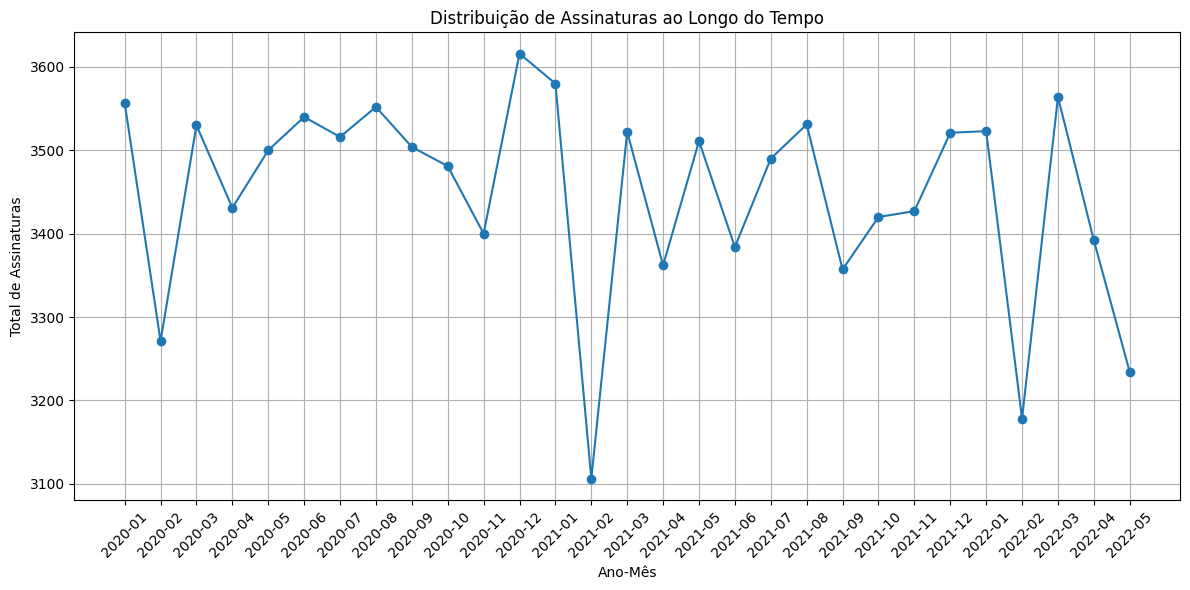

In [36]:
from pyspark.sql.functions import year, month, count
import matplotlib.pyplot as plt
import pandas as pd

# Extrair ano e mês e contar assinaturas
df_dates = df_spark.withColumn("Year", year("Subscription Date")) \
                   .withColumn("Month", month("Subscription Date"))

assinaturas_por_tempo = df_dates.groupBy("Year", "Month") \
                               .agg(count("*").alias("Total_Assinaturas")) \
                               .orderBy("Year", "Month")

# Converter para pandas para plotar
pdf = assinaturas_por_tempo.toPandas()

# Criar coluna para data no formato ano-mês para ficar bonito no gráfico
pdf['YearMonth'] = pdf['Year'].astype(str) + '-' + pdf['Month'].astype(str).str.zfill(2)

# Plotar gráfico de linhas
plt.figure(figsize=(12,6))
plt.plot(pdf['YearMonth'], pdf['Total_Assinaturas'], marker='o')
plt.xticks(rotation=45)
plt.xlabel('Ano-Mês')
plt.ylabel('Total de Assinaturas')
plt.title('Distribuição de Assinaturas ao Longo do Tempo')
plt.grid(True)
plt.tight_layout()
plt.show()


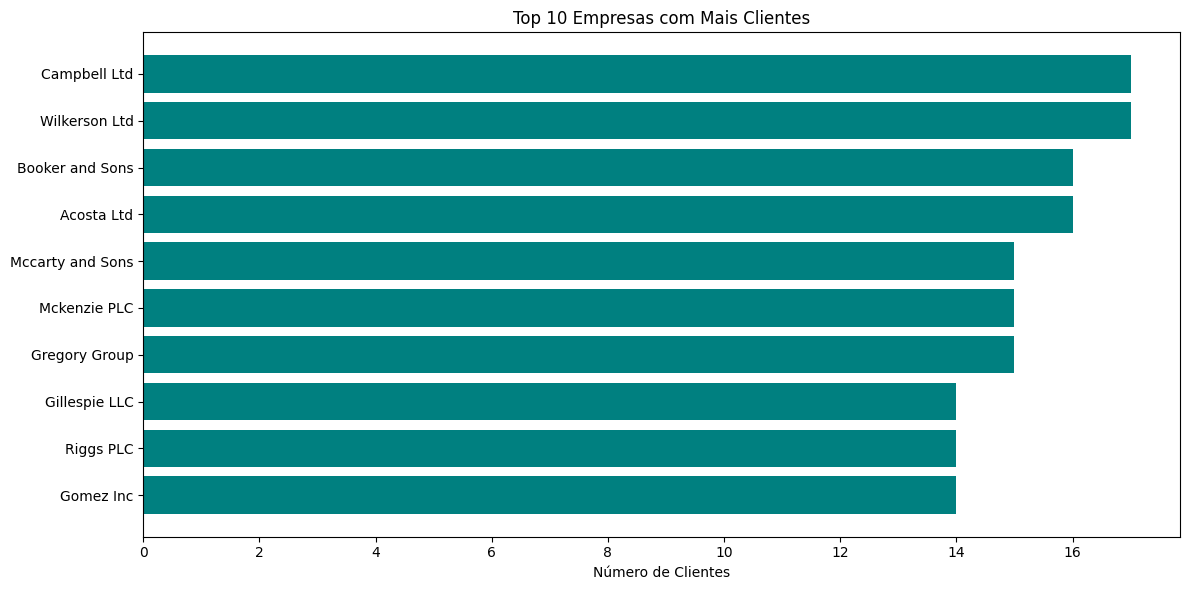

In [38]:
import matplotlib.pyplot as plt

# Top 10 empresas com mais clientes
top_empresas = df_spark.groupBy("Company") \
                       .count() \
                       .orderBy("count", ascending=False) \
                       .limit(10)

# Converter para pandas
pdf_top_empresas = top_empresas.toPandas()

# Plotar gráfico
plt.figure(figsize=(12, 6))
plt.barh(pdf_top_empresas["Company"][::-1], pdf_top_empresas["count"][::-1], color="teal")
plt.xlabel("Número de Clientes")
plt.title("Top 10 Empresas com Mais Clientes")
plt.tight_layout()
plt.show()


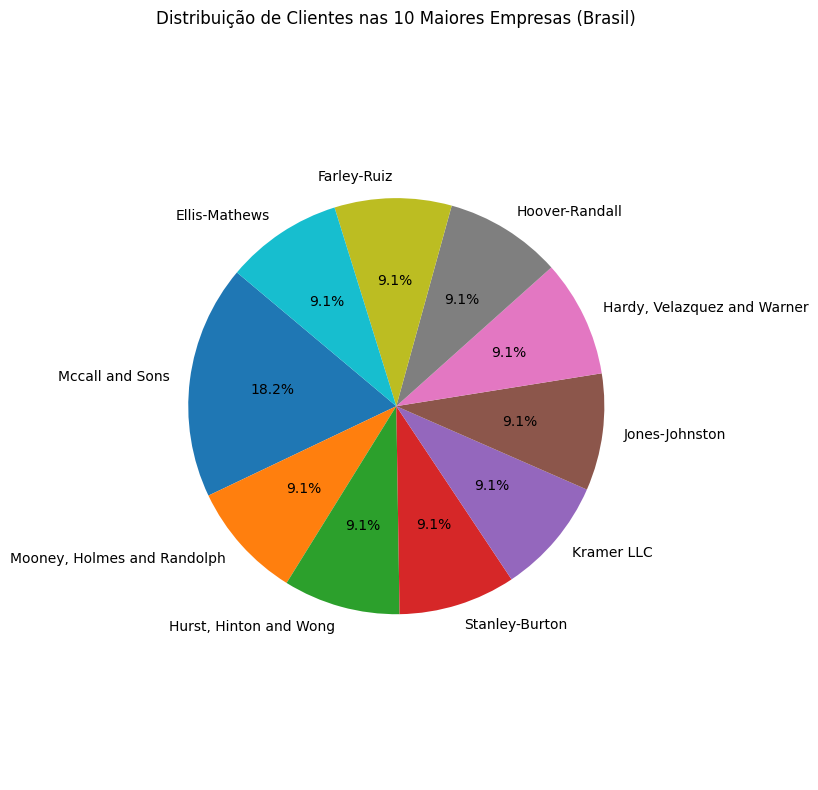

In [39]:
# ── Gráfico de pizza: top‑10 empresas por número de clientes no Brasil ──
from pyspark.sql.functions import col
import matplotlib.pyplot as plt

# 1) filtra apenas clientes cujo Country == "Brazil"
clientes_brasil = df_spark.filter(col("Country") == "Brazil")

# 2) conta clientes por Company, ordena decrescente e pega só as 10 maiores
top_empresas_brasil = (
    clientes_brasil
    .groupBy("Company")
    .count()
    .orderBy("count", ascending=False)
    .limit(10)
    .toPandas()          # converte para pandas para plotar
)

# 3) gera o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(
    top_empresas_brasil["count"],
    labels=top_empresas_brasil["Company"],
    autopct="%1.1f%%",
    startangle=140
)
plt.axis("equal")  # mantém o círculo perfeito
plt.title("Distribuição de Clientes nas 10 Maiores Empresas (Brasil)")
plt.tight_layout()
plt.show()
